<a href="https://colab.research.google.com/github/filipesartori/Segmenta-oPython/blob/main/Segmenta%C3%A7%C3%A3o_T%C3%A9cnicas_Classicas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Bibliotecas e Importações




In [36]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow

In [37]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [38]:
!cp -R /content/gdrive/MyDrive/Colab\ Notebooks/Segmentação\ Python/imagens/ imagens/

Limiarização global


In [39]:
img = cv2.imread('/content/imagens/paisagem01.jpg')
rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(rgb, cv2.COLOR_RGB2GRAY)

In [40]:
def mostrar(imagem):
  fig = plt.gcf()
  fig.set_size_inches(18,6)
  plt.imshow(imagem, cmap='gray')
  plt.axis('off')
  plt.show()

Tipos de Limiarização

In [41]:
def exibir_limiarização(img, limiar=127):
  _, thresh_binary = cv2.threshold(gray, limiar, 255, cv2.THRESH_BINARY) 
  _, thresh_binary_inv = cv2.threshold(gray, limiar, 255, cv2.THRESH_BINARY_INV) 
  _, thresh_trunc = cv2.threshold(gray, limiar, 255, cv2.THRESH_TRUNC) 
  _, thresh_tozero = cv2.threshold(gray, limiar, 255, cv2.THRESH_TOZERO)
  _, thresh_tozero_inv = cv2.threshold(gray, limiar, 255, cv2.THRESH_TOZERO_INV)

  titulos = ['Imagem Original','Binary', 'Binary INV','Trunc','To Zero', 'To zero INV' ]
  imagens = [img, thresh_binary, thresh_binary_inv, thresh_trunc, thresh_tozero, thresh_tozero_inv]

  fig = plt.gcf()
  fig.set_size_inches(18, 12)

  for i in range(6):
    plt.subplot(2, 3, i + 1)
    plt.imshow(cv2.cvtColor(imagens[i], cv2.COLOR_BGR2RGB), cmap ='gray')
    plt.title(titulos[i])
    plt.xticks([]), plt.yticks([])
  plt.show()

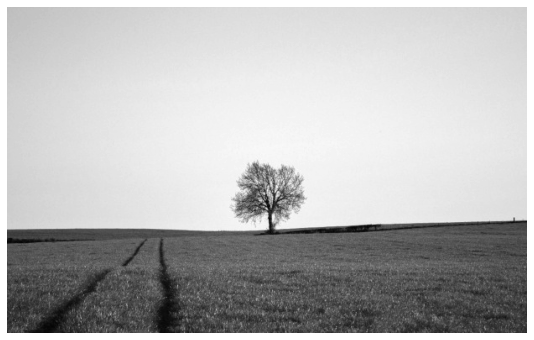

In [42]:
mostrar(gray)

In [43]:
limiar = 159

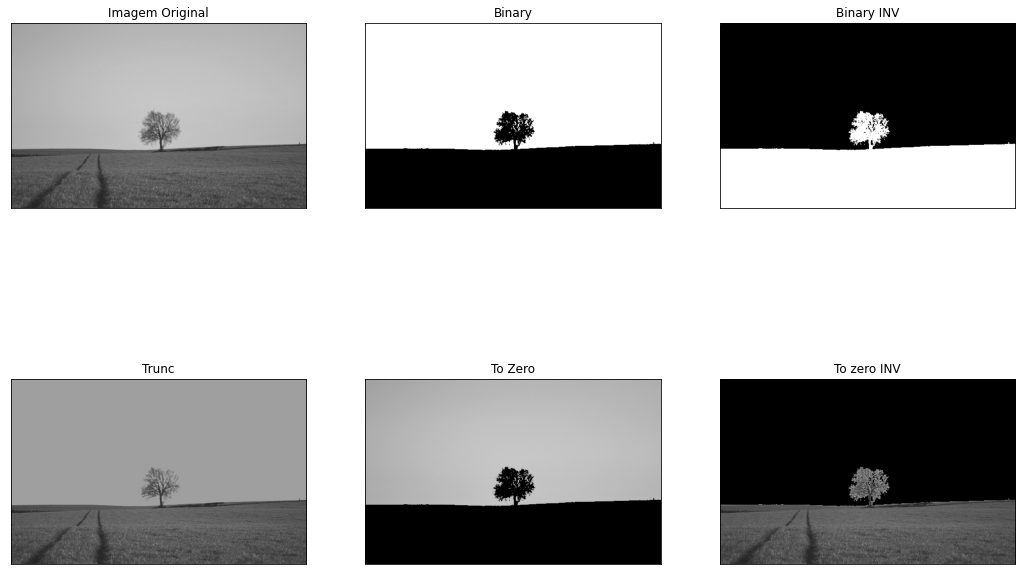

In [44]:
exibir_limiarização(gray, limiar)

Método de Otsu

In [45]:
valor, otsu = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
print(valor)

136.0


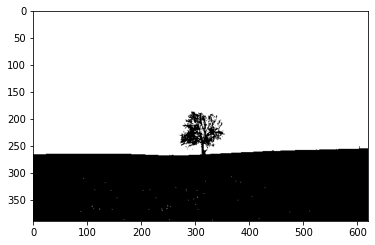

In [46]:
plt.imshow(otsu, cmap='gray');

Histogramas

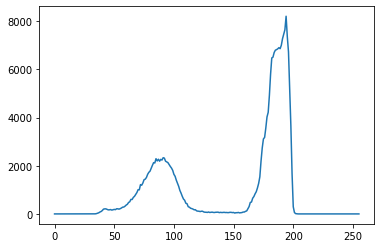

In [47]:
histograma, bins = np.histogram(gray, 256, [0, 256])
plt.plot(histograma);

Melhorando segmentação em imagens com ruidos

In [48]:
img = cv2.imread('/content/imagens/folha_ruido.jpg')
rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(rgb, cv2.COLOR_RGB2GRAY)

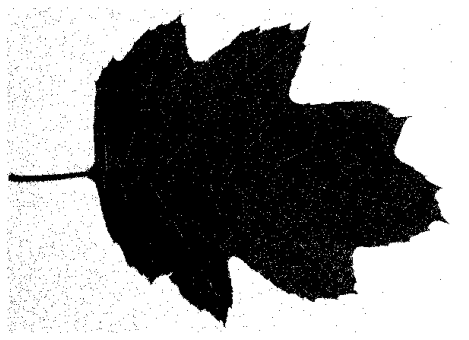

In [49]:
valor, otsu = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU) #imagens com muito ruido
mostrar(otsu)

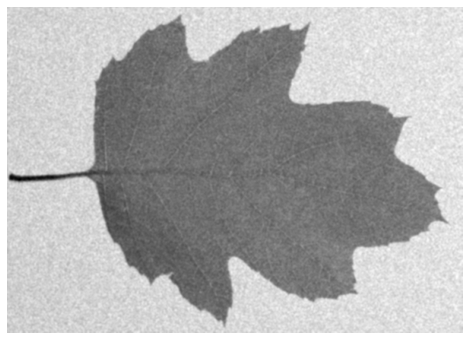

In [50]:
desfoque = cv2.GaussianBlur(gray, (5, 5), 0)
mostrar(desfoque)

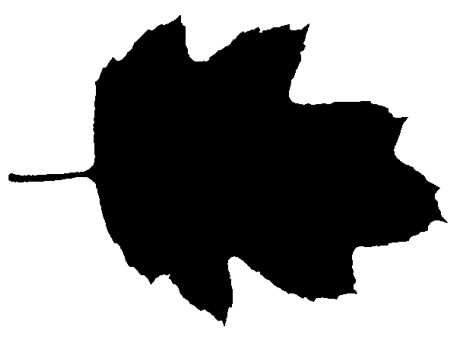

In [51]:
valor, otsu = cv2.threshold(desfoque, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU) #imagens com muito ruido
mostrar(otsu)

Limiarização Adaptativa

In [52]:
def limiarizacao_adaptativa(link, limiar = 140, block_size = 11, C = 9):
  img = cv2.imread(link)
  rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  gray = cv2.cvtColor(rgb, cv2.COLOR_RGB2GRAY)

  _, limiar_global = cv2.threshold(gray, limiar, 255, cv2.THRESH_BINARY)
  limiar_media = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, block_size, C) #Baseada na média
  limiar_gauss = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, block_size, C) #baseada em calculos de Gauss

  imagens = [img, limiar_global, limiar_media, limiar_gauss]
  titulos = ['Imagem Original', 'Limiarização Global', 'Limiarização Adaptativa Média', 'Limiarização Adaptativa Gaussiana']

  fig = plt.gcf()
  fig.set_size_inches(18, 12)

  for i in range(4):
    plt.subplot(2,2, i+1)
    plt.imshow(cv2.cvtColor(imagens[i], cv2.COLOR_BGR2RGB), cmap='gray')
    plt.title(titulos[i])
    plt.xticks([]), plt.yticks([])

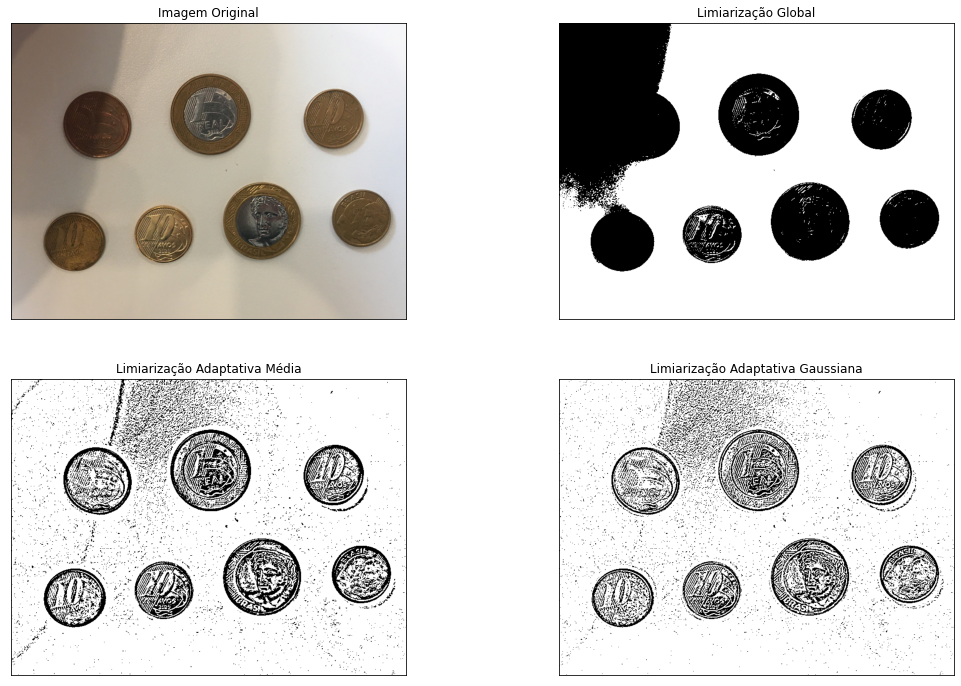

In [53]:
limiarizacao_adaptativa('/content/imagens/moedas02.jpg', 130, 15, 3)

Segmentação com contornos

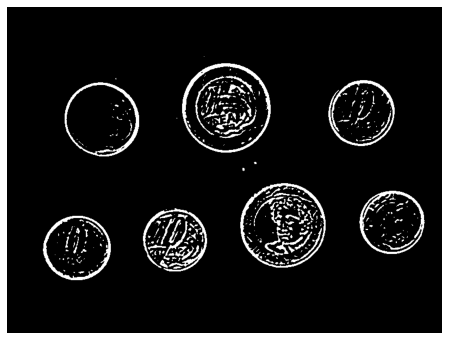

In [54]:
img = cv2.imread('/content/imagens/moedas02.jpg')
rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(rgb, cv2.COLOR_RGB2GRAY)

img_processada = img.copy()
desfoque = cv2.GaussianBlur(gray, (7,7), 0)
adapt_gauss = cv2.adaptiveThreshold(desfoque, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 15, 4)
mostrar(adapt_gauss)

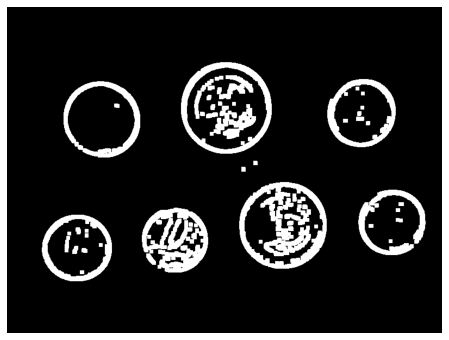

In [55]:
kernel = np.ones((3,3), np.uint8)
erosao = cv2.erode(adapt_gauss, kernel)
dilatacao = cv2.dilate(erosao, kernel, iterations=3)
mostrar(dilatacao)

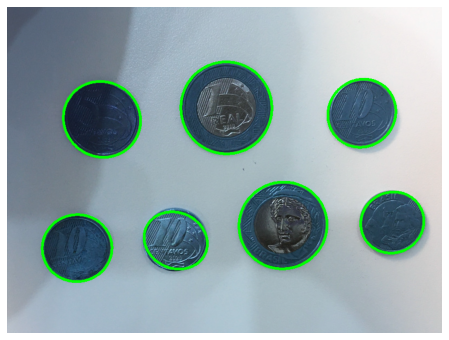

In [56]:
elementos = dilatacao.copy()
contornos, hierarquia = cv2.findContours(elementos, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

img_processada = img.copy()
for cnt in contornos:
  area = cv2.contourArea(cnt)
  if len(cnt) >= 100:
    elipse = cv2.fitEllipse(cnt)
    cv2.ellipse(img_processada, elipse, (0,255,0), 3)
mostrar(img_processada)

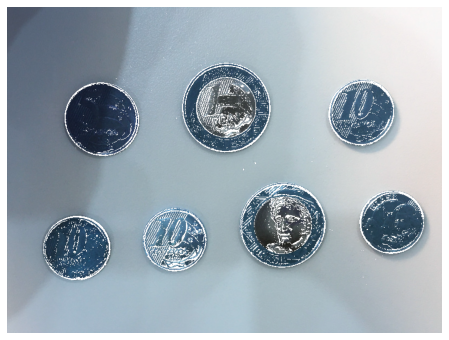

In [57]:
adapt_gauss = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 15, 11)
sobrepor = cv2.add(img, cv2.cvtColor(adapt_gauss, cv2.COLOR_GRAY2BGR))
mostrar(sobrepor)

Canny Edge e Operador Sobel

In [58]:
def segmentacao_bordas(link):
  img = cv2.imread(link)
  rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  gray = cv2.cvtColor(rgb, cv2.COLOR_RGB2GRAY)

  desfoque = cv2.GaussianBlur(gray, (5, 5), 0)
  k_sobelx = np.array(([-1,0,1],
                     [-2,0,2],
                     [-1,0,1]), np.float32)
  k_sobely = np.array(([-1,-2,-1],
                      [0,0,0],
                      [1,2,1]), np.float32)

  sobel_x = cv2.filter2D(desfoque, cv2.CV_64F, k_sobelx)
  sobel_y = cv2.filter2D(desfoque, cv2.CV_64F, k_sobely)
  sobel_x = cv2.convertScaleAbs(sobel_x)
  sobel_y = cv2.convertScaleAbs(sobel_y)
  sobel = cv2.addWeighted(src1 = sobel_x, alpha=0.5, src2 = sobel_y, beta = 0.5, gamma = 150)

  canny = cv2.Canny(desfoque, 80, 140) 

  kernel = np.ones((3, 3), np.uint8)
  dilatacao = cv2.dilate(canny, kernel, iterations = 2)
  erosao = cv2.erode(dilatacao, kernel, iterations = 1)

  imagens = [img, sobel, canny, erosao]
  titulo = ['Imagem Original', 'Sobel', 'Canny Edge', 'Canny Edge + Fechamento']

  fig = plt.gcf()
  fig.set_size_inches(18, 12)

  for i in range(4):
    plt.subplot(2, 2, i+1)
    plt.imshow(cv2.cvtColor(imagens[i], cv2.COLOR_BGR2RGB), 'gray')
    plt.title(titulo[i])
    plt.xticks([]), plt.yticks([])
    plt.subplots_adjust(wspace = 0.1)

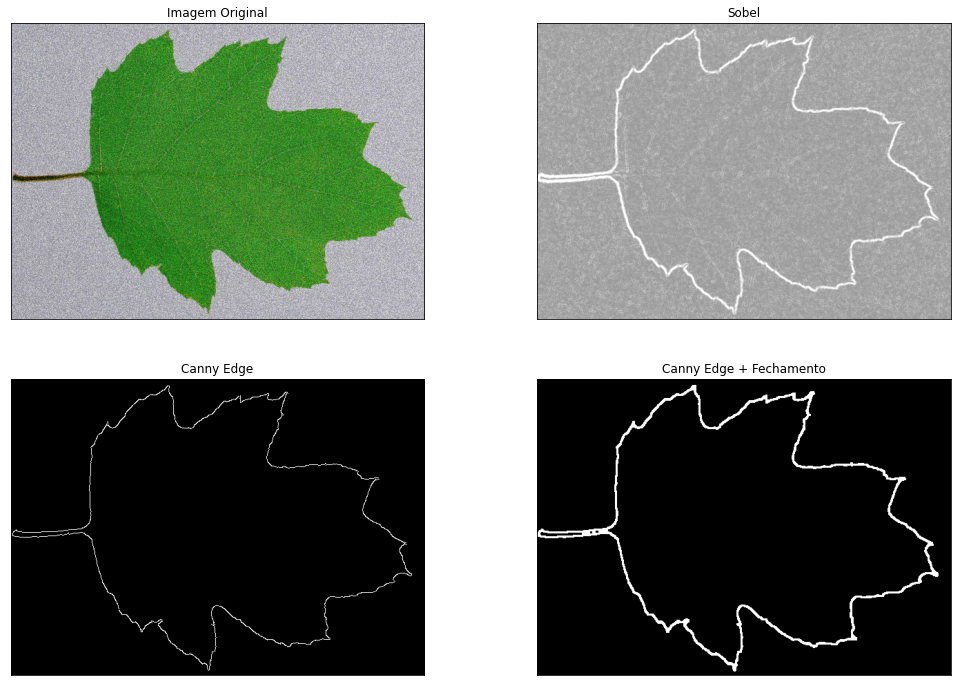

In [59]:
segmentacao_bordas('/content/imagens/folha_ruido.jpg')